In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
# Load the dataset from a CSV file
df = pd.read_csv('Bestsellers with categories.csv')


In [25]:
# Preview the dataset
print(df.head())

# Step 2: Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Fill missing values for numerical columns with mean
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].mean())
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Year'] = df['Year'].fillna(df['Year'].mean())

# Fill missing categorical values with 'Unknown'
df['Author'] = df['Author'].fillna('Unknown')
df['Genre'] = df['Genre'].fillna('Unknown')



                                                Name  Author  User Rating  \
0                      10-Day Green Smoothie Cleanse     114          4.7   
1                                  11/22/63: A Novel     219          4.6   
2            12 Rules for Life: An Antidote to Chaos     134          4.7   
3                             1984 (Signet Classics)      95          4.7   
4  5,000 Awesome Facts (About Everything!) (Natio...     174          4.8   

   Reviews  Price  Year  Genre  
0    17350      8  2016      1  
1     2052     22  2011      0  
2    18979     15  2018      1  
3    21424      6  2017      0  
4     7665     12  2019      1  
Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [5]:
# Step 3: Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Convert 'Author' and 'Genre' into numerical format
label_encoder = LabelEncoder()
df['Author'] = label_encoder.fit_transform(df['Author'])
df['Genre'] = label_encoder.fit_transform(df['Genre'])

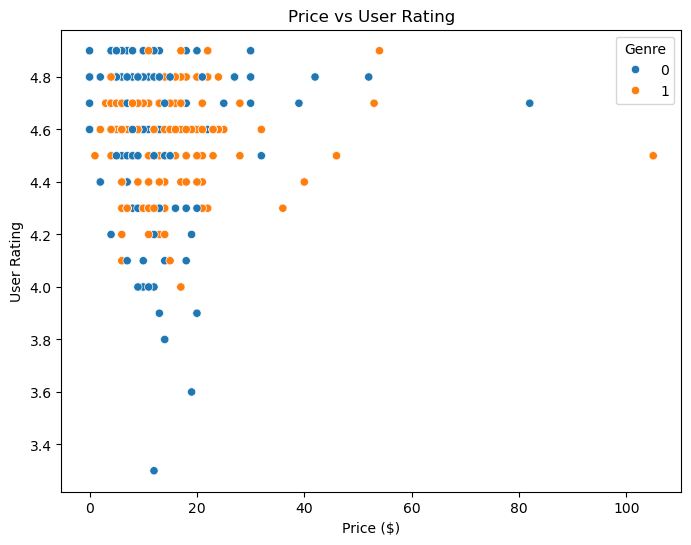

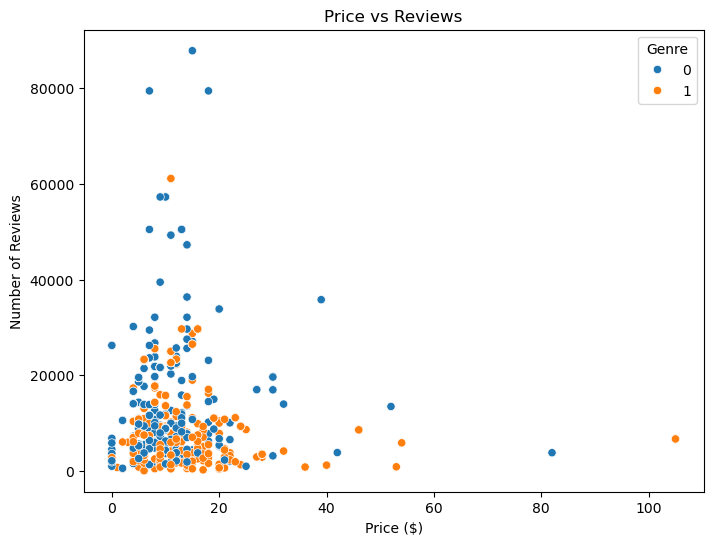

In [7]:
# Visualizing Price vs User Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price', y='User Rating', hue='Genre')
plt.title('Price vs User Rating')
plt.xlabel('Price ($)')
plt.ylabel('User Rating')
plt.show()

# Visualizing Price vs Reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price', y='Reviews', hue='Genre')
plt.title('Price vs Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Number of Reviews')
plt.show()


In [9]:
# Step 5: Correlation Analysis
# Calculate correlation matrix
correlation = df[['Price', 'User Rating', 'Reviews']].corr()
print("Correlation matrix:")
print(correlation)

# Step 6: Price Impact Analysis with Regression
# We will now build a regression model to assess the impact of price on User Rating and Reviews.


Correlation matrix:
                Price  User Rating   Reviews
Price        1.000000    -0.133086 -0.109182
User Rating -0.133086     1.000000 -0.001729
Reviews     -0.109182    -0.001729  1.000000


In [11]:
# Model 1: Predicting User Rating based on Price
X = df[['Price']]  # Feature: Price
y = df['User Rating']  # Target: User Rating

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model_rating = LinearRegression()
model_rating.fit(X_train, y_train)

LinearRegression()

In [13]:
# Step 7: Evaluate the Model for User Rating Prediction
y_pred_rating = model_rating.predict(X_test)
mse_rating = mean_squared_error(y_test, y_pred_rating)
rmse_rating = mse_rating ** 0.5
r2_rating = r2_score(y_test, y_pred_rating)

# Print evaluation metrics for User Rating
print(f"Mean Squared Error (User Rating): {mse_rating:.2f}")
print(f"Root Mean Squared Error (User Rating): {rmse_rating:.2f}")
print(f"R^2 Score (User Rating): {r2_rating:.2f}")

# Model 2: Predicting Reviews based on Price
X_reviews = df[['Price']]  # Feature: Price
y_reviews = df['Reviews']  # Target: Reviews

Mean Squared Error (User Rating): 0.06
Root Mean Squared Error (User Rating): 0.24
R^2 Score (User Rating): 0.01


In [15]:
# Split the data into training and testing sets
X_train_reviews, X_test_reviews, y_train_reviews, y_test_reviews = train_test_split(X_reviews, y_reviews, test_size=0.2, random_state=42)

# Create and train the linear regression model for Reviews
model_reviews = LinearRegression()
model_reviews.fit(X_train_reviews, y_train_reviews)

# Step 8: Evaluate the Model for Reviews Prediction
y_pred_reviews = model_reviews.predict(X_test_reviews)
mse_reviews = mean_squared_error(y_test_reviews, y_pred_reviews)
rmse_reviews = mse_reviews ** 0.5
r2_reviews = r2_score(y_test_reviews, y_pred_reviews)


In [17]:
# Print evaluation metrics for Reviews
print(f"Mean Squared Error (Reviews): {mse_reviews:.2f}")
print(f"Root Mean Squared Error (Reviews): {rmse_reviews:.2f}")
print(f"R^2 Score (Reviews): {r2_reviews:.2f}")

# Step 9: Price Impact Analysis Conclusion
print("\nPrice impact on User Rating (Regression Coefficients):")
print(f"Intercept: {model_rating.intercept_}")
print(f"Price coefficient: {model_rating.coef_[0]}")

print("\nPrice impact on Reviews (Regression Coefficients):")
print(f"Intercept: {model_reviews.intercept_}")
print(f"Price coefficient: {model_reviews.coef_[0]}")

Mean Squared Error (Reviews): 167181599.73
Root Mean Squared Error (Reviews): 12929.87
R^2 Score (Reviews): -0.01

Price impact on User Rating (Regression Coefficients):
Intercept: 4.659516265762399
Price coefficient: -0.0029547219324668394

Price impact on Reviews (Regression Coefficients):
Intercept: 13499.87416296975
Price coefficient: -135.54186956712604


In [19]:
# Predict User Rating and Reviews for a new price point (example)
new_price = [[19.99]]  # New price value
predicted_rating = model_rating.predict(new_price)
predicted_reviews = model_reviews.predict(new_price)

print(f"Predicted User Rating for a book with price $19.99: {predicted_rating[0]:.2f}")
print(f"Predicted Number of Reviews for a book with price $19.99: {predicted_reviews[0]:.2f}")

Predicted User Rating for a book with price $19.99: 4.60
Predicted Number of Reviews for a book with price $19.99: 10790.39


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


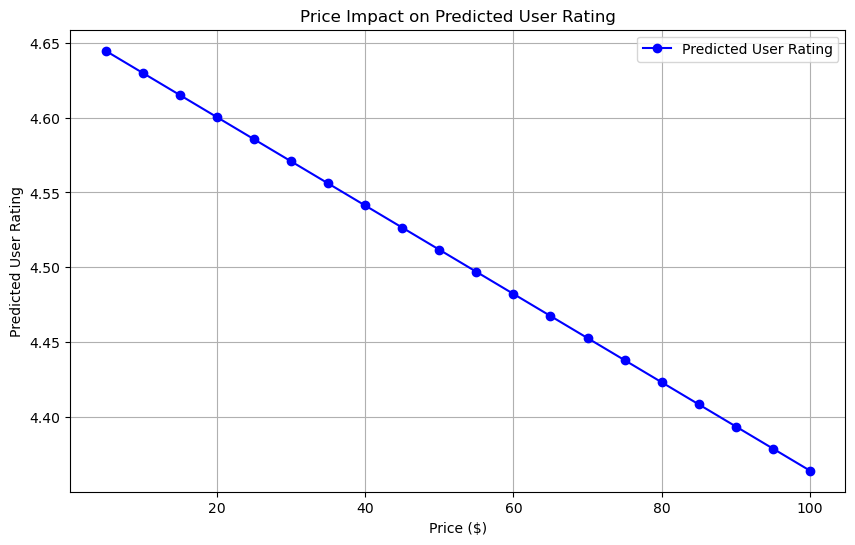

In [21]:
# Bonus: Plotting Predicted User Rating and Reviews for a range of Prices
price_range = pd.DataFrame({'Price': [i for i in range(5, 101, 5)]})

# Predict the User Rating and Reviews for this price range
predicted_rating_range = model_rating.predict(price_range)
predicted_reviews_range = model_reviews.predict(price_range)

# Plot Price vs Predicted User Rating
plt.figure(figsize=(10, 6))
plt.plot(price_range['Price'], predicted_rating_range, color='blue', marker='o', linestyle='-', label='Predicted User Rating')
plt.title('Price Impact on Predicted User Rating')
plt.xlabel('Price ($)')
plt.ylabel('Predicted User Rating')
plt.grid(True)
plt.legend()
plt.show()


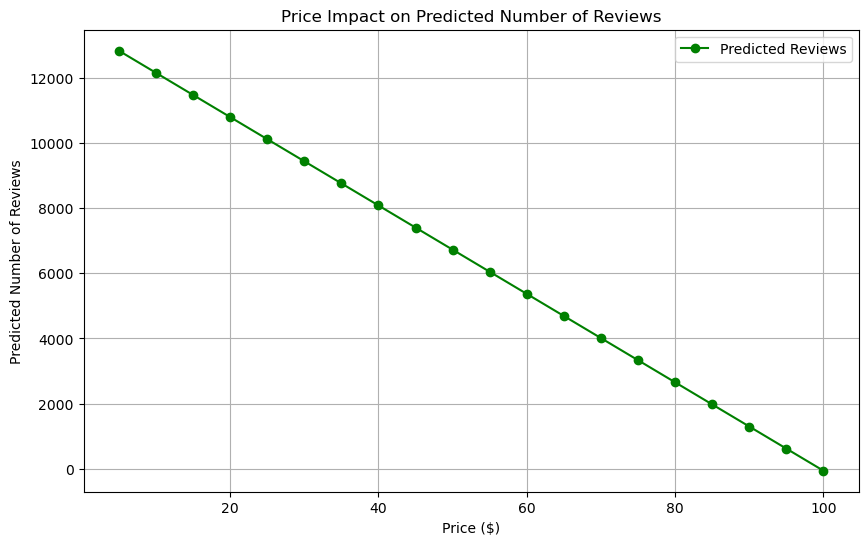

In [23]:
# Plot Price vs Predicted Reviews
plt.figure(figsize=(10, 6))
plt.plot(price_range['Price'], predicted_reviews_range, color='green', marker='o', linestyle='-', label='Predicted Reviews')
plt.title('Price Impact on Predicted Number of Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Predicted Number of Reviews')
plt.grid(True)
plt.legend()
plt.show()